In [1]:
import numpy as np
from PIL import Image
import sklearn
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import random
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Model
from tensorflow.keras.losses import *
from tensorflow.keras.regularizers import *
from tensorflow.keras.initializers import *
from tensorflow.keras.models import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import *
from tensorflow.keras.datasets import *
from tensorflow.keras.preprocessing.image import *
from tensorflow.keras.preprocessing.text import * 
from tensorflow.keras.preprocessing.sequence import * 

# Model subclassing

subclassing the model class. it inherits from the model class. create layers in initialzer, define them in the forward pass called the call method.

the call method takes one required arguent - input into model. call the dense layer on the inputs and return the results.

the next step is to create an instance of the model. this object inherits from the model base class so it has all the methods like fit and compile.

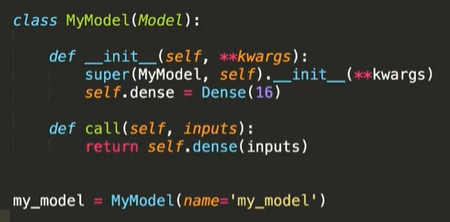

In [2]:
Image.open(r'C:\Users\44788/Desktop\it1.png')

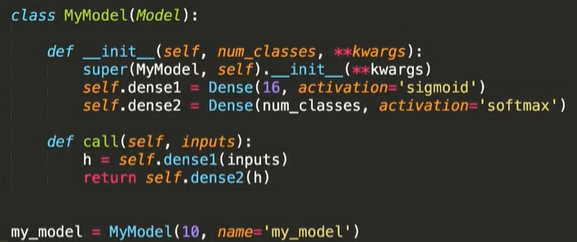

In [3]:
Image.open(r'C:\Users\44788/Desktop\it2.png')

this model has an extra layer of manipulability, this is because you can sapecify the number of classes when instatiating the model.

this argument is used in the second dense layer.

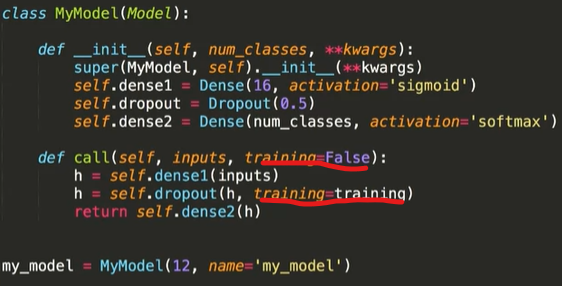

In [4]:
Image.open(r'C:\Users\44788/Desktop\it3.png')

at test time the dropout layer does nothing.

In [10]:
class MyModel(Model):
    def __init__(self):
        super(MyModel, self).__init__()
        self.dense_1 = Dense(64, activation='relu')
        self.dense_2 = Dense(10)
        self.dropout = Dropout(0.4)
        self.dense_3 = Dense(5)
        self.softmax = Softmax()
        
    def call(self, inputs, training=True):
        x = self.dense_1(inputs)
        if training:
            x = self.dropout(x)
        y = self.dense_2(inputs)
        y = self.dense_3(y)
        concat = concatenate([x,y])
        return self.softmax(concat)

In [11]:
model = MyModel()
model(tf.random.uniform([1,10]))
model.summary()

Model: "my_model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              multiple                  704       
_________________________________________________________________
dense_7 (Dense)              multiple                  110       
_________________________________________________________________
dropout_2 (Dropout)          multiple                  0         
_________________________________________________________________
dense_8 (Dense)              multiple                  55        
_________________________________________________________________
softmax (Softmax)            multiple                  0         
Total params: 869
Trainable params: 869
Non-trainable params: 0
_________________________________________________________________


# Custom layers

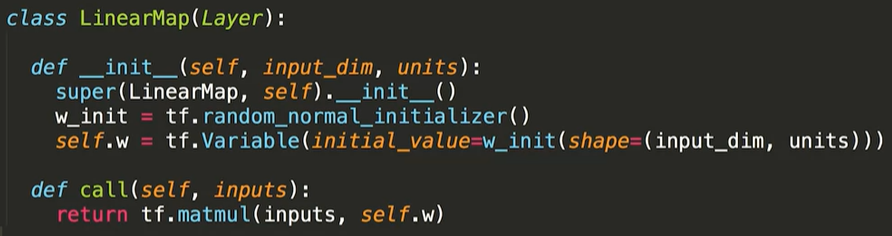

In [12]:
Image.open(r'C:\Users\44788/Desktop\it4.png')

importing the layer class. 

create layer variable in the initilizer and the layer operation in the class method.

in the initializer creating one variable (weigths and biases are tf.Variables) within a class attribute, the values of this variable will be initialized when the layer is created. 

in this example we have used the tf.random_normal_initilizer to initializer the starting values. then passing this variable into the variable contructor and specifying the dimensions of the variable.

in this custom layer it is just a matrix multiplication of the inputs with the variables.

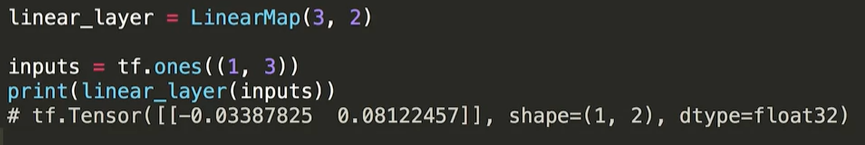

In [13]:
Image.open(r'C:\Users\44788/Desktop\it5.png')

shortcut when writing custom layers....

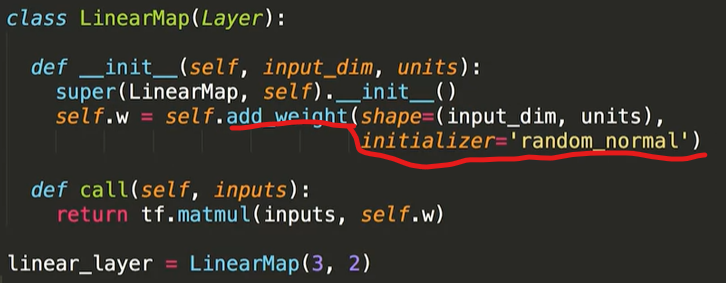

In [14]:
Image.open(r'C:\Users\44788/Desktop\it6.png')

In [22]:
class MyLayer(Layer):
    def __init__(self, units, input_dim):
        super(MyLayer, self).__init__()
        self.w = self.add_weight(shape=(input_dim, units), initializer='random_normal')
        self.b = self.add_weight(shape=(units,), initializer='zeros')
    
    def call(self, inputs):
        return tf.matmul(inputs, self.w)+self.b
    
dense_layer = MyLayer(3, 5)
x = tf.ones((1,5))
print(dense_layer(x))
print(dense_layer.weights)

tf.Tensor([[-0.10150068  0.13593823 -0.1026402 ]], shape=(1, 3), dtype=float32)
[<tf.Variable 'Variable:0' shape=(5, 3) dtype=float32, numpy=
array([[-0.00774714,  0.02477782, -0.03726212],
       [-0.01109173,  0.03967713,  0.01527536],
       [ 0.06586287, -0.0899143 , -0.04393474],
       [-0.07202771,  0.10557202,  0.01926384],
       [-0.07649697,  0.05582555, -0.05598254]], dtype=float32)>, <tf.Variable 'Variable:0' shape=(3,) dtype=float32, numpy=array([0., 0., 0.], dtype=float32)>]


In [26]:
class MyLayer(Layer):
    def __init__(self, units, input_dim):
        super(MyLayer, self).__init__()
        self.w = self.add_weight(shape=(input_dim, units), initializer='random_normal', trainable=False)
        self.b = self.add_weight(shape=(units,), initializer='zeros', trainable=False)
    
    def call(self, inputs):
        return tf.matmul(inputs, self.w)+self.b
    
dense_layer = MyLayer(3, 5)
print('non-trainiable weights:', len(dense_layer.non_trainable_weights))

non-trainiable weights: 2


In [27]:
class MyLayer(Layer):
    def __init__(self, units, input_dim):
        super(MyLayer, self).__init__()
        self.w = self.add_weight(shape=(input_dim, units), initializer='random_normal')
        self.b = self.add_weight(shape=(units,), initializer='zeros')
        self.sum_activation = tf.Variable(initial_value=tf.zeros((units,)), trainable=False)
        self.number_call = tf.Variable(initial_value=0, trainable=False)
    
    def call(self, inputs):
        activations = tf.matmul(inputs, self.w)+self.b
        self.sum_activation.assign_add(tf.reduce_sum(activations, axis=0))
        self.number_call.assign_add(inputs.shape[0])
        return activations, self.sum_activation/ tf.cast(self.number_call, tf.float32)

In [29]:
dense_layer = MyLayer(3, 5)
x, activation_means = dense_layer(tf.ones((1,5)))
print(activation_means.numpy())

[-0.1526853   0.09657198 -0.31127614]


In [31]:
class MyLayer(Layer):

    def __init__(self, units, **kwargs):
        super(MyLayer, self).__init__(**kwargs)
        self.units = units
    
    def build(self, input_shape):
        self.w = self.add_weight(shape=(input_shape[-1], self.units),
                                 initializer='random_normal')
        self.b = self.add_weight(shape=(self.units,),
                                 initializer='zeros')
    def call(self, inputs):
        return tf.matmul(inputs, self.w)+self.b

In [30]:
class MyModel(Model):

    def __init__(self, units_1, units_2, **kwargs):
        super(MyModel, self).__init__(**kwargs)
        self.layer_1 = MyLayer(units_1)
        self.layer_2 = MyLayer(units_2)

    def call(self, inputs):
        x = self.layer_1(inputs)
        x = tf.nn.relu(x)
        x = self.layer_2(x)
        return Softmax()(x)

In [32]:
model = MyModel(units_1=32, units_2=10)
_ = model(tf.ones((1, 100)))
model.summary()

Model: "my_model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
my_layer_12 (MyLayer)        multiple                  3232      
_________________________________________________________________
my_layer_13 (MyLayer)        multiple                  330       
Total params: 3,562
Trainable params: 3,562
Non-trainable params: 0
_________________________________________________________________


# Automatic differentiation

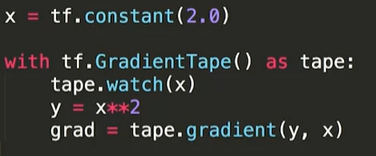

In [33]:
Image.open(r'C:\Users\44788/Desktop\it7.png')

constant tensor x initialized. plays the role of the independant variable that we want to differentiate with respect to.

tf.gradientTape context. and within this context set up the operations that define the function that we want to differentiate.

tape.watch any operations performed on x after this within this context will be recorded. 

after this we define a new tensor by squaring the tensor x. this is the function f(x) = x**2 evaluated at the point x = 2. want to take the derivitve of x and calculate the derivitve at x=2.

to do this we use tape.gradient(tensor output y, tensor want to differntiate with repsect to.

store it in the tensor grad. the resulting tensor is a scaler of 4.0 as we would expect.

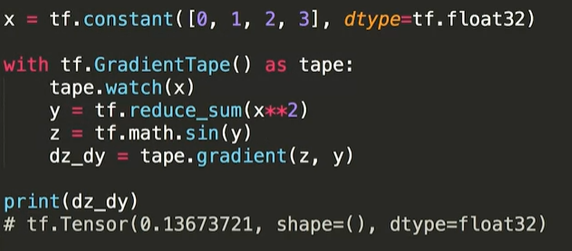

In [34]:
Image.open(r'C:\Users\44788/Desktop\it8.png')

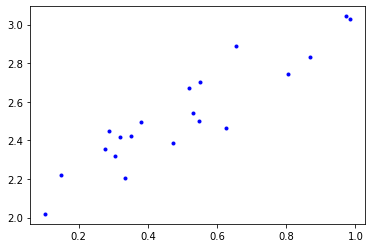

In [37]:
def MakeNoisyData(m, b, n=20):
    x = tf.random.uniform(shape=(n,))
    noise = tf.random.normal(shape=(len(x),), stddev=0.1)
    y = m * x + b + noise
    return x, y
x_train, y_train = MakeNoisyData(1,2)
plt.plot(x_train, y_train, 'b.')

In [40]:
class LinearLayer(Layer):
    def __init__(self):
        super(LinearLayer, self).__init__()
        self.m = self.add_weight(shape=(1,),
                                 initializer='random_normal')
        self.b = self.add_weight(shape=(1,),
                                 initializer='zeros')
    def call(self, inputs):
        return self.m*inputs+self.b

linear_regression = LinearLayer()

print(linear_regression(x_train))
print(linear_regression.weights)

tf.Tensor(
[0.08348932 0.04566481 0.0563022  0.04054901 0.05380568 0.06924164
 0.03261086 0.01265954 0.04716996 0.02460466 0.0301782  0.07463328
 0.04725449 0.02750613 0.00889105 0.04460319 0.02618589 0.084532
 0.02869552 0.02374477], shape=(20,), dtype=float32)
[<tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([0.08591296], dtype=float32)>, <tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>]


In [42]:
def SquaredError(y_pred, y_true):
    return tf.reduce_mean(tf.square(y_pred - y_true))

starting_loss = SquaredError(linear_regression(x_train), y_train)
print('starting loss:', starting_loss.numpy())

starting loss: 6.2722907


In [43]:
learning_rate = 0.05
steps = 25

for i in range(steps):
    with tf.GradientTape() as tape:
        predictions = linear_regression(x_train)
        loss = SquaredError(predictions, y_train)
    
    gradients = tape.gradient(loss, linear_regression.trainable_variables)
    
    linear_regression.m.assign_sub(learning_rate * gradients[0])
    linear_regression.b.assign_sub(learning_rate * gradients[1])

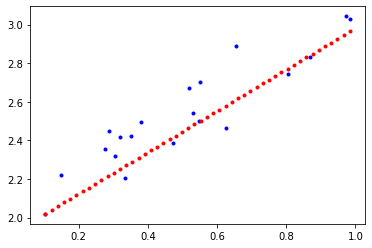

In [45]:
plt.plot(x_train, y_train, 'b.')
x_linear_regression=np.linspace(min(x_train), max(x_train),50)
plt.plot(x_linear_regression, linear_regression.m*x_linear_regression+linear_regression.b, 'r.')

# custom training loops

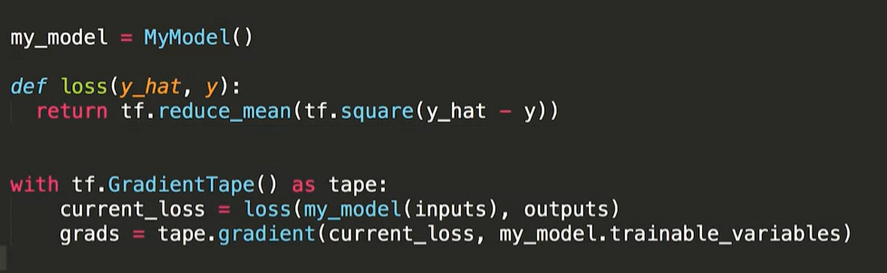

In [46]:
Image.open(r'C:\Users\44788/Desktop\it9.png')

loss is the square of the error, using tf.reduce mean to collape the vector and take a scaler tensor.

next set up the tf.gradientTape instance, however this time not using the gradient watch. this is because computations that nake use of tensor flow variable objects are autoatically watched by gradient tape.

compute the loss and calling the model function to calculate predicitons. 

to caclualte the gradient call upon the gradient object, where the first argument is the loss, and the second is the parameters to be updated.

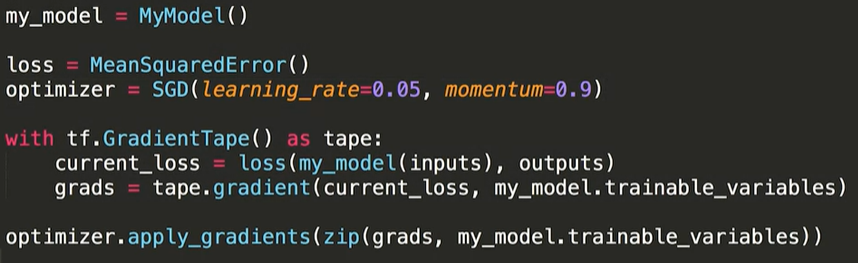

In [48]:
Image.open(r'C:\Users\44788/Desktop\it11.png')

now to update the parameters based on an optimizing algorithm...

however, what about updating gradients based on different numbers of batches.

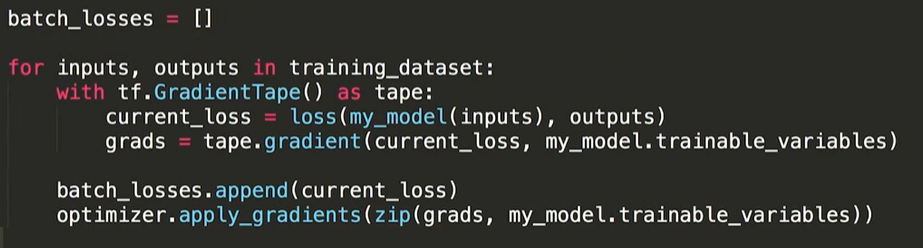

In [50]:
Image.open(r'C:\Users\44788/Desktop\it12.png')

however to train for more than one epoch...

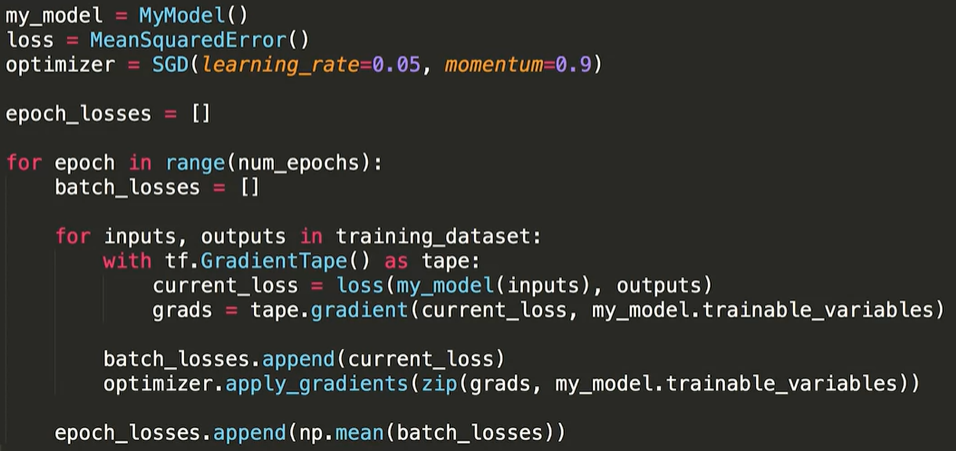

In [51]:
Image.open(r'C:\Users\44788/Desktop\it13.png')

In [61]:
class MyLayer(Layer):
    def __init__(self, units):
        super(MyLayer, self).__init__()
        self.units = units
    
    def build(self, input_shape):
        self.w = self.add_weight(shape=(input_shape[-1], self.units), initializer='random_normal', name='kernel')
        self.b = self.add_weight(shape=(self.units,), initializer='zeros', name='bias')
    
    def call(self, inputs):
        return tf.matmul(inputs, self.w)+self.b
    
class MyDropout(Layer):
    def __init__(self, rate):
        super(MyDropout, self).__init__()
        self.rate = rate
    def call(self, inputs):
        return tf.nn.dropout(inputs, rate=self.rate)
    
class MyModel(Model):
    def __init__(self, units_1, units_2, units_3):
        super(MyModel, self).__init__()
        self.layer_1 = MyLayer(units_1)
        self.dropout_1 = MyDropout(0.5)
        self.layer_2 = MyLayer(units_2)
        self.dropout_2 = MyDropout(0.5)
        self.layer_3 = MyLayer(units_3)
        self.softmax = Softmax()
        
    def call(self, inputs):
        x = self.layer_1(inputs)
        x = tf.nn.relu(x)
        x = self.dropout_1(x)
        x = self.layer_2(x)
        x = tf.nn.relu(x)
        x = self.dropout_2(x)
        x = self.layer_3(x)
        return self.softmax(x)

In [62]:
model = MyModel(64,64,64)
print(model(tf.ones((1,10000))))
model.summary()

tf.Tensor(
[[0.00970781 0.01934464 0.01518454 0.02148063 0.00937635 0.01276557
  0.0173375  0.02078339 0.01598008 0.00794426 0.00775688 0.01407027
  0.00637283 0.02126452 0.00733601 0.02668896 0.0188979  0.01009078
  0.02797103 0.00691806 0.00431769 0.0092744  0.01040833 0.00564105
  0.02628494 0.01081015 0.00723314 0.00769016 0.00864223 0.01179225
  0.01031863 0.00814642 0.00706151 0.00734844 0.01983505 0.00588935
  0.01386259 0.02373702 0.01076142 0.00951878 0.01052974 0.08080883
  0.00419002 0.04734973 0.0242043  0.01245834 0.00561855 0.01219043
  0.00863361 0.04281549 0.02031828 0.03734282 0.00838634 0.02169655
  0.0065784  0.01149691 0.01300614 0.00515538 0.03150222 0.00453368
  0.03335909 0.0054723  0.02251087 0.01399639]], shape=(1, 64), dtype=float32)
Model: "my_model_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
my_layer_26 (MyLayer)        multiple                  640064    
____________

In [63]:
from tensorflow.keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

class_names = ['cocoa','grain','veg-oil','earn','acq','wheat','copper','housing','money-supply',
   'coffee','sugar','trade','reserves','ship','cotton','carcass','crude','nat-gas',
   'cpi','money-fx','interest','gnp','meal-feed','alum','oilseed','gold','tin',
   'strategic-metal','livestock','retail','ipi','iron-steel','rubber','heat','jobs',
   'lei','bop','zinc','orange','pet-chem','dlr','gas','silver','wpi','hog','lead']

2113536/2110848 [==============================] - 0s 0us/step


C:\Users\44788\anaconda3\envs\tensor\lib\site-packages\tensorflow\python\keras\datasets\reuters.py:148: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
C:\Users\44788\anaconda3\envs\tensor\lib\site-packages\tensorflow\python\keras\datasets\reuters.py:149: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [64]:
word_to_index = reuters.get_word_index()

invert_word_index = dict([(value, key) for (key, value) in word_to_index.items()])
text_news = ' '.join([invert_word_index.get(i - 3, '?') for i in train_data[0]])

557056/550378 [==============================] - 0s 0us/step


In [65]:
def bag_of_words(text_samples, elements=10000):
    output = np.zeros((len(text_samples), elements))
    for i, word in enumerate(text_samples):
        output[i, word] = 1.
    return output

x_train = bag_of_words(train_data)
x_test = bag_of_words(test_data)

print("Shape of x_train:", x_train.shape)
print("Shape of x_test:", x_test.shape)

Shape of x_train: (8982, 10000)
Shape of x_test: (2246, 10000)
